# Linear Regression Assingment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the training data

In [31]:
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')

## Our next step is to divide the data into “attributes” and “labels”.

In [15]:
x = dfx.values
y = dfy.values
print(x.shape)
print(y.shape)
print(x)
print(y)
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x)
print(y)

(3750, 1)
(3750, 1)
[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


In [4]:
print(x.shape)
print(y.shape)

(3750,)
(3750,)


## Visualise and Preprocess

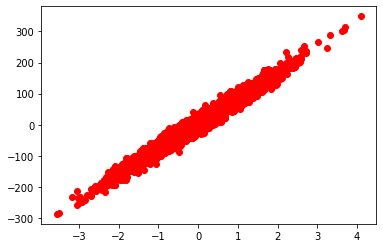

In [19]:
plt.scatter(x,y,color='r')
plt.show()

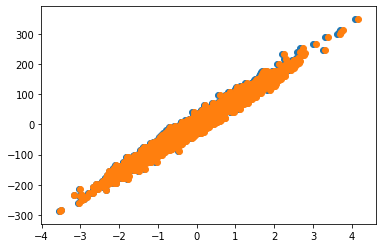

In [9]:

X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

## Gradient Descent Algorithm
    ->Start with a random theta
    ->Repeat until converge
        ->Update Theta according to the rule

In [20]:
#Defineing hypothesis

# y = m*x + c
#theta[0] = c
#theta[1] = m

def hypothesis(x,theta):
    return theta[0] + theta[1]*x





In [ ]:
# Defineing Error Function / Cost Function

def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error*0.5


In [ ]:
# Defineing the function for update rule

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

### Algorithm

In [11]:
#Applying gradient descent in linear regression

def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr=500
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [44]:
final_theta, error_list,theta_list = gradientDescent(X,Y,learning_rate=0.0001)

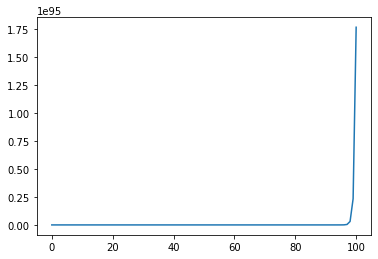

In [36]:
#Ploting Error

plt.plot(error_list)
plt.show()

In [37]:
print(final_theta)

[6.32941229e+44 1.88443012e+46]


## Ploting the line for testing data


In [38]:

xtest = pd.read_csv('Linear_X_Test.csv')
xtest=xtest.values.reshape((-1,))
print(xtest)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


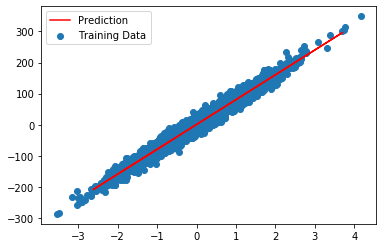

In [46]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='r',label="Prediction")
plt.legend()
plt.show()